In [15]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
start_date = '2000-01-01'
end_date = '2025-12-24'
TICKERS = ['AG', 'PAAS', 'SI=F', 'GC=F']

df = yf.download(tickers=TICKERS, start=start_date, end=end_date).dropna()
df

/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_60291/3317509057.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=TICKERS, start=start_date, end=end_date).dropna()
[*********************100%***********************]  4 of 4 completed


Price           Close                                          High  \
Ticker             AG         GC=F       PAAS       SI=F         AG   
Date                                                                  
2006-11-28   3.850744   637.200012  19.012337  13.620000   3.850744   
2006-11-29   3.870491   635.500000  19.369305  13.566000   3.909986   
2006-11-30   3.890239   646.900024  20.129801  13.925000   3.890239   
2006-12-01   3.761880   644.700012  19.749559  14.006000   3.900112   
2006-12-04   3.840869   645.200012  20.137569  14.061000   3.900112   
...               ...          ...        ...        ...        ...   
2025-12-17  16.379999  4347.500000  50.000000  66.237000  17.000000   
2025-12-18  16.150000  4339.500000  50.049999  64.592003  16.770000   
2025-12-19  16.690001  4361.399902  51.770000  66.845001  17.070000   
2025-12-22  17.520000  4444.600098  53.740002  67.905998  17.910000   
2025-12-23  17.379999  4482.799805  53.840000  70.485001  17.850000   

Price                                                Low               \
Ticker             GC=F       PAAS       SI=F         AG         GC=F   
Date                                                                    
2006-11-28   637.200012  19.128738  13.620000   3.682891   637.200012   
2006-11-29   640.299988  19.384825  13.805000   3.791501   634.500000   
2006-11-30   648.000000  20.222922  14.000000   3.791502   635.000000   
2006-12-01   649.700012  20.230687  14.020000   3.732259   643.500000   
2006-12-04   648.000000  20.145328  14.100000   3.752006   640.500000   
...                 ...        ...        ...        ...          ...   
2025-12-17  4351.399902  50.599998  66.474998  16.209999  4308.500000   
2025-12-18  4348.100098  50.820000  65.775002  16.030001  4328.200195   
2025-12-19  4361.399902  52.340000  66.845001  16.230000  4350.100098   
2025-12-22  4447.600098  54.410000  68.864998  17.280001  4371.100098   
2025-12-23  4503.799805  54.369999  70.574997  16.780001  4450.399902   

Price                                  Open                          \
Ticker           PAAS       SI=F         AG         GC=F       PAAS   
Date                                                                  
2006-11-28  18.570009  13.620000   3.850744   637.200012  18.764013   
2006-11-29  18.864896  13.550000   3.870491   638.400024  18.864896   
2006-11-30  19.477949  13.540000   3.890239   635.000000  19.516749   
2006-12-01  19.524515  13.800000   3.761880   645.700012  20.191887   
2006-12-04  19.586599  13.945000   3.840869   647.099976  19.734042   
...               ...        ...        ...          ...        ...   
2025-12-17  49.189999  65.089996  16.879999  4308.500000  50.400002   
2025-12-18  49.470001  64.279999  16.170000  4331.000000  50.220001   
2025-12-19  50.150002  66.485001  16.270000  4350.100098  50.250000   
2025-12-22  53.180000  67.004997  17.379999  4371.100098  53.480000   
2025-12-23  52.779999  69.074997  17.799999  4503.299805  54.240002   

Price                      Volume                                
Ticker           SI=F          AG     GC=F        PAAS     SI=F  
Date                                                             
2006-11-28  13.620000     19800.0  82649.0   1880800.0  19892.0  
2006-11-29  13.620000     58200.0  29111.0   1511800.0  15023.0  
2006-11-30  13.550000     24300.0   2327.0   2058600.0   2097.0  
2006-12-01  13.900000     23000.0    728.0   1166700.0    602.0  
2006-12-04  14.050000     86200.0    562.0    955700.0    303.0  
...               ...         ...      ...         ...      ...  
2025-12-17  65.279999  25477400.0   2169.0   5332800.0    233.0  
2025-12-18  65.775002  20388600.0    705.0   5065700.0    118.0  
2025-12-19  66.495003  25631600.0   1065.0  11740100.0    144.0  
2025-12-22  67.004997  18708700.0    449.0   6952000.0    130.0  
2025-12-23  69.080002  20799100.0    694.0   5528000.0     40.0  

[4795 rows x 20 columns]

<Axes: xlabel='Date'>

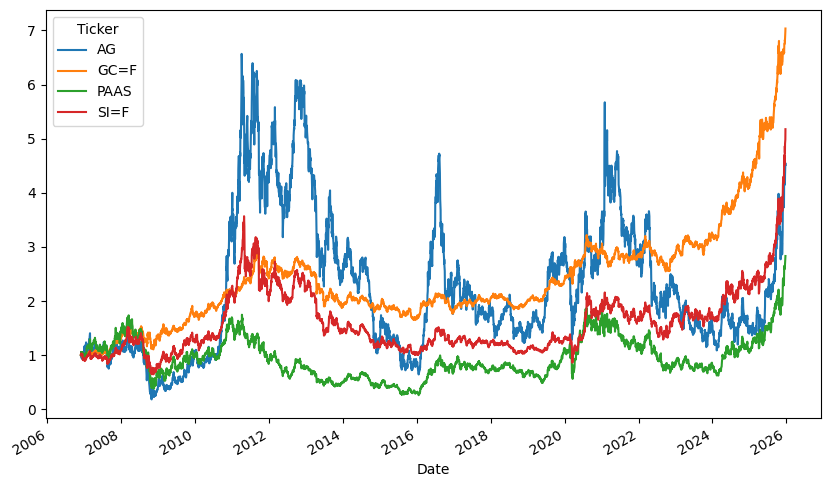

In [17]:
(df.dropna()['Close'] / df.dropna()['Close'].iloc[0]).plot(figsize=(10, 6))

In [18]:
# re-index from start
index_df = df.dropna()['Close'] / df.dropna()['Close'].iloc[0]

In [19]:
index_df.pct_change().corr()

Ticker,AG,GC=F,PAAS,SI=F
Ticker,,,,
AG,1.000000,0.520512,0.744978,0.569807
GC=F,0.520512,1.000000,0.577265,0.790799
PAAS,0.744978,0.577265,1.000000,0.587786
SI=F,0.569807,0.790799,0.587786,1.000000


In [20]:
index_df.pct_change().describe()

Ticker,AG,GC=F,PAAS,SI=F
count,4794.000000,4794.000000,4794.000000,4794.000000
mean,0.001164,0.000469,0.000743,0.000553
std,0.041285,0.011117,0.032437,0.020406
min,-0.242315,-0.093538,-0.213496,-0.177541
25%,-0.021547,-0.004757,-0.016554,-0.009015
50%,0.000000,0.000513,0.000000,0.000806
75%,0.023009,0.006289,0.017720,0.010694
max,0.319587,0.090277,0.301075,0.129707


In [21]:
return_df = index_df.pct_change().fillna(0)

In [22]:
index_df

Ticker,AG,GC=F,PAAS,SI=F
Date,,,,
2006-11-28,1.000000,1.000000,1.000000,1.000000
2006-11-29,1.005128,0.997332,1.018776,0.996035
2006-11-30,1.010257,1.015223,1.058776,1.022394
2006-12-01,0.976923,1.011770,1.038776,1.028341
2006-12-04,0.997436,1.012555,1.059184,1.032379
...,...,...,...,...
2025-12-17,4.253723,6.822818,2.629871,4.863216
2025-12-18,4.193995,6.810264,2.632501,4.742438
2025-12-19,4.334228,6.844632,2.722969,4.907856


In [4]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd
# import time
# 
# def scrape_dividend_max():
#     base_url = "https://www.dividendmax.com/market-index-constituents/ftse-350"
#     all_data = []
#     page = 1
# 
#     headers = {
#         "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
#     }
# 
#     print("Starting scrape...")
# 
#     while page <= 13:
#         url = f"{base_url}?page={page}"
#         print(f"Scraping {url}...")
# 
#         response = requests.get(url, headers=headers)
#         if response.status_code != 200:
#             print("Finished or reached an error.")
#             break
# 
#         soup = BeautifulSoup(response.text, 'html.parser')
#         table = soup.find('table')
# 
#         if not table:
#             break
# 
#         rows = table.find_all('tr')[1:] # Skip header row
# 
#         for row in rows:
#             cols = row.find_all('td')
#             if len(cols) >= 5:
#                 # Extracting data
#                 company = cols[0].get_text(strip=True)
#                 ticker = cols[1].get_text(strip=True)
#                 # The flag/exchange column often has a span or image
#                 exchange = cols[2].get_text(strip=True)
#                 sector = cols[3].get_text(strip=True)
#                 market_cap = cols[4].get_text(strip=True)
# 
#                 all_data.append({
#                     "Company": company,
#                     "Ticker": ticker,
#                     "Exchange": exchange,
#                     "Sector": sector,
#                     "Market Cap": market_cap
#                 })
# 
#         # Check if there is a 'next' button or if we've reached the end
#         # DividendMax shows '31-60 of 564'. If the first number > total, stop.
#         pagination_text = soup.find(class_='pagination-info') # Adjust selector if needed
#         if not rows:
#             break
# 
#         page += 1
#         time.sleep(1) # Be polite to the server
# 
#     # Convert to DataFrame and Save
#     df = pd.DataFrame(all_data)
#     df.to_excel("FTSE350_Data.xlsx", index=False)
#     print(f"Success! Saved {len(df)} companies to STOXX600_Data.xlsx")
# 
# if __name__ == "__main__":
#     scrape_dividend_max()

Starting scrape...
Scraping https://www.dividendmax.com/market-index-constituents/ftse-350?page=1...
Scraping https://www.dividendmax.com/market-index-constituents/ftse-350?page=2...
Scraping https://www.dividendmax.com/market-index-constituents/ftse-350?page=3...
Scraping https://www.dividendmax.com/market-index-constituents/ftse-350?page=4...
Scraping https://www.dividendmax.com/market-index-constituents/ftse-350?page=5...
Scraping https://www.dividendmax.com/market-index-constituents/ftse-350?page=6...
Scraping https://www.dividendmax.com/market-index-constituents/ftse-350?page=7...
Scraping https://www.dividendmax.com/market-index-constituents/ftse-350?page=8...
Scraping https://www.dividendmax.com/market-index-constituents/ftse-350?page=9...
Scraping https://www.dividendmax.com/market-index-constituents/ftse-350?page=10...
Scraping https://www.dividendmax.com/market-index-constituents/ftse-350?page=11...
Scraping https://www.dividendmax.com/market-index-constituents/ftse-350?page=